# Pipeline

For demonstration purpases we use a prerecorded run. We divide this run into chunks of length $N$ and on them do our processing and prediction steps. In reality the chunks would be a sliding window in time. 


In [70]:
import os
import json
import numpy as np
from matplotlib import pyplot as plt
from utils import load_as_dataframe
from load_model import svm_predict
from visualization import visualize

## Load run

In [71]:
folder = 'data'
subfolder = 'mixed'
filename = 'mixed_farness_1_moving_0_radardata_2022_05_07_19_36_16.npz'

df = load_as_dataframe(os.path.join(folder, subfolder), filename)
print(df)

         abses0    abses1    abses2      phases
0      0.362268  0.910821  1.279175   -1.912324
1      0.344860  0.942366  1.295628   -1.913908
2      0.358893  0.939846  1.307893   -1.936225
3      0.357415  0.969497  1.318963   -1.943178
4      0.351504  0.981379  1.322059   -1.957358
...         ...       ...       ...         ...
59995  0.220435  1.891982  1.544448 -276.666986
59996  0.254215  1.870624  1.537223 -276.705120
59997  0.262518  1.879985  1.522271 -276.759845
59998  0.252522  1.858930  1.527405 -276.830134
59999  0.288086  1.844086  1.517415 -276.886744

[60000 rows x 4 columns]


## Model

In [72]:
model_folder = 'svm_acc_95_2022_05_08_16_19_22'

with open(os.path.join(model_folder, 'hyperparams.json'), 'r') as f:
    hyperparams = json.load(f)

In [73]:
pred_movement = svm_predict(model_folder, df)
pred_movement_repeatd = np.repeat(pred_movement, hyperparams['chunk_size'])


100%|██████████| 20/20 [00:00<00:00, 100.25it/s]


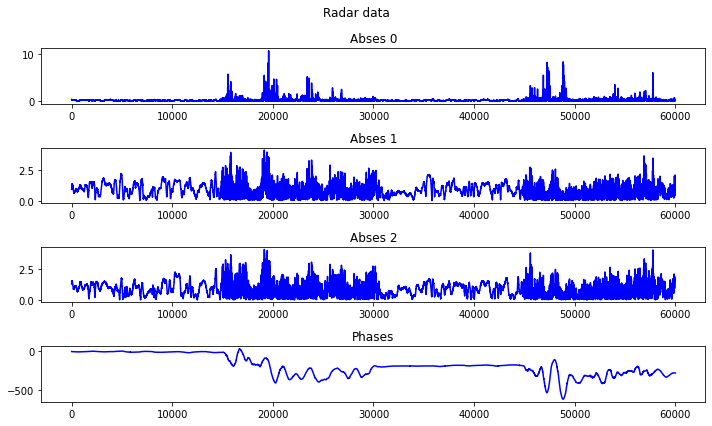

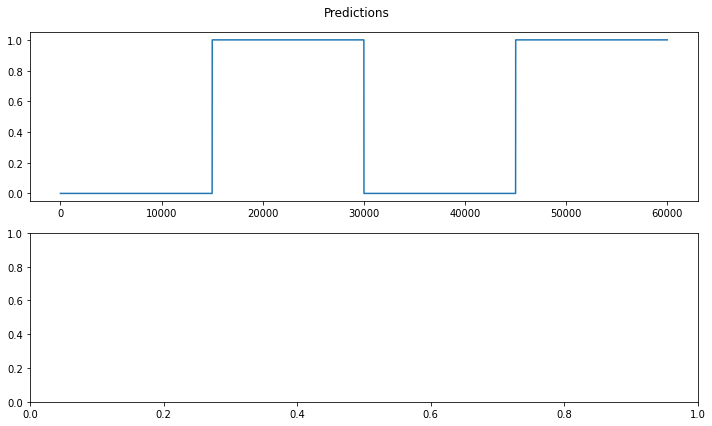

In [74]:
title = 'Radar data'
color = 'blue'
figsize = (10, 6)

visualize(os.path.join(folder, subfolder), filename, title, color, figsize=figsize)

fig, ax = plt.subplots(2, 1, figsize=figsize)
fig.suptitle('Predictions')

ax[0].plot(pred_movement_repeatd)
ax[0].set_title('Movement prediction')
fig.tight_layout()